<a href="https://colab.research.google.com/github/nancylopez1108/Datascience/blob/main/Proyectoparte_III_LOPEZ.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Proyecto Data Science - Primera entrega - Lopez Nancy

El presente análisis exploratorio tiene como objetivo evaluar el comportamiento de los clientes de una tienda minorista, con el fin de identificar patrones de consumo y posibles factores asociados al gasto.
El conjunto de datos utilizado está conformado por 2.240 registros y diversas variables que describen características demográficas, niveles de ingreso, hábitos de compra y participación en campañas promocionales.

A lo largo del estudio, se busca determinar qué tipos de productos son más consumidos por los distintos segmentos de clientes, así como analizar si dicho comportamiento presenta relación con la edad o con el nivel de ingreso.
Para ello, se agrupan los clientes en rangos etarios y se examinan las tendencias de gasto promedio en categorías como vinos, frutas y productos de lujo.

Además, se realizó un tratamiento de valores atípicos (outliers) con el propósito de obtener una representación más fiel de la realidad y evitar que observaciones extremas distorsionen las conclusiones.
Este proceso permitió ajustar las distribuciones de gasto y facilitar la comparación entre grupos.

En conjunto, este análisis busca aportar información relevante sobre el perfil de consumo de los clientes, ofreciendo una base sólida para futuras estrategias de segmentación, marketing personalizado y optimización de ventas.

#     Hipótesis Reformuladas

¿El ingreso y los consumos específicos vino, carne, etc. predicen el gasto total?.

¿El factor edad puede predecir el gasto de un consumo especifico?.

¿El gasto total puede predecirse razonablemente bien a partir de los consumos específicos vino, carne, frutas, etc?.









In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.ensemble import RandomForestRegressor


In [2]:
file_url = "https://docs.google.com/spreadsheets/d/e/2PACX-1vTI8tA7l4IgwqxzLM0Cm4BtXtNnsGZwKRBjwGBALAP18X9CuVBUj7hhD_EzBRHe6A/pub?gid=1102552891&single=true&output=csv"
file_path = file_url
super_df = pd.read_csv(file_path)
super_df.head()

,ID,Año_nacimiento,Educación,Estado_civil,Ingreso,Niños_casa,Adolscente_casa,Registro,Última_compra,Monto_vinos,...,Visitas_web_mes,Campaña3_aceptada,Campaña4_aceptada,Campaña5_aceptada,Campaña1_aceptada,Campaña2_aceptadas,Reclamo,Costo_contacto,Ingreso_base,Responde_campaña
0,5524,1957,Graduation,Single,58138.0,0,0,9/4/2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,3/8/2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,8/21/2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2/10/2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,1/19/2014,94,173,...,5,0,0,0,0,0,0,3,11,0


Se agregan columnas para el posterior análisis

In [3]:
super_df['Monto_total'] = (
    super_df['Monto_vinos'] +
    super_df['Monto_frutas'] +
    super_df['Monto_carne'] +
    super_df['Monto_pescado'] +
    super_df['Monto_dulces'] +
    super_df['Monto_pro_lujo']
)

In [4]:
super_df['Edad'] = 2025 - super_df['Año_nacimiento']

In [5]:

Año_nacimiento = 'Año_nacimiento'
if Año_nacimiento in super_df.columns:
    print(f"columna clasificada'{Año_nacimiento}")
    condiciones = [
        (super_df[Año_nacimiento] <= 1954),
        (super_df[Año_nacimiento] >= 1955) & (super_df[Año_nacimiento] <= 1979),
        (super_df[Año_nacimiento] >= 1980) ]

    valores = ['Adulto_mayor', 'Adulto', 'joven']
    super_df['grupo'] = np.select(condiciones, valores, default='No definido')
    print(super_df[['Año_nacimiento', 'grupo']].head())

columna clasificada'Año_nacimiento
   Año_nacimiento         grupo
0            1957        Adulto
1            1954  Adulto_mayor
2            1965        Adulto
3            1984         joven
4            1981         joven


In [6]:
super_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 32 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  2240 non-null   int64  
 1   Año_nacimiento      2240 non-null   int64  
 2   Educación           2240 non-null   object 
 3   Estado_civil        2240 non-null   object 
 4   Ingreso             2216 non-null   float64
 5   Niños_casa          2240 non-null   int64  
 6   Adolscente_casa     2240 non-null   int64  
 7   Registro            2240 non-null   object 
 8   Última_compra       2240 non-null   int64  
 9   Monto_vinos         2240 non-null   int64  
 10  Monto_frutas        2240 non-null   int64  
 11  Monto_carne         2240 non-null   int64  
 12  Monto_pescado       2240 non-null   int64  
 13  Monto_dulces        2240 non-null   int64  
 14  Monto_pro_lujo      2240 non-null   int64  
 15  Compra_descuento    2240 non-null   int64  
 16  Compra

In [7]:
super_df.describe()

,ID,Año_nacimiento,Ingreso,Niños_casa,Adolscente_casa,Última_compra,Monto_vinos,Monto_frutas,Monto_carne,Monto_pescado,...,Campaña4_aceptada,Campaña5_aceptada,Campaña1_aceptada,Campaña2_aceptadas,Reclamo,Costo_contacto,Ingreso_base,Responde_campaña,Monto_total,Edad
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000,2240.000000,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107,605.798214,56.194196
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274,602.249288,11.984069
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,5.000000,29.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,68.750000,48.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,396.000000,55.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,1045.500000,66.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000,2525.000000,132.000000


In [8]:
super_df.head()

,ID,Año_nacimiento,Educación,Estado_civil,Ingreso,Niños_casa,Adolscente_casa,Registro,Última_compra,Monto_vinos,...,Campaña5_aceptada,Campaña1_aceptada,Campaña2_aceptadas,Reclamo,Costo_contacto,Ingreso_base,Responde_campaña,Monto_total,Edad,grupo
0,5524,1957,Graduation,Single,58138.0,0,0,9/4/2012,58,635,...,0,0,0,0,3,11,1,1617,68,Adulto
1,2174,1954,Graduation,Single,46344.0,1,1,3/8/2014,38,11,...,0,0,0,0,3,11,0,27,71,Adulto_mayor
2,4141,1965,Graduation,Together,71613.0,0,0,8/21/2013,26,426,...,0,0,0,0,3,11,0,776,60,Adulto
3,6182,1984,Graduation,Together,26646.0,1,0,2/10/2014,26,11,...,0,0,0,0,3,11,0,53,41,joven
4,5324,1981,PhD,Married,58293.0,1,0,1/19/2014,94,173,...,0,0,0,0,3,11,0,422,44,joven


In [9]:
conteo_nulos = super_df.isnull().sum()
print(conteo_nulos)

ID                     0
Año_nacimiento         0
Educación              0
Estado_civil           0
Ingreso               24
Niños_casa             0
Adolscente_casa        0
Registro               0
Última_compra          0
Monto_vinos            0
Monto_frutas           0
Monto_carne            0
Monto_pescado          0
Monto_dulces           0
Monto_pro_lujo         0
Compra_descuento       0
Compras_web            0
Compra_catalogo        0
Tienda                 0
Visitas_web_mes        0
Campaña3_aceptada      0
Campaña4_aceptada      0
Campaña5_aceptada      0
Campaña1_aceptada      0
Campaña2_aceptadas     0
Reclamo                0
Costo_contacto         0
Ingreso_base           0
Responde_campaña       0
Monto_total            0
Edad                   0
grupo                  0
dtype: int64


Como podemos ver solo los ingresos tienen datos nulos y como es un numero muy pequeño seran eliminados



In [10]:
conteo_nulos = super_df.isnull().sum()
print(conteo_nulos)

ID                     0
Año_nacimiento         0
Educación              0
Estado_civil           0
Ingreso               24
Niños_casa             0
Adolscente_casa        0
Registro               0
Última_compra          0
Monto_vinos            0
Monto_frutas           0
Monto_carne            0
Monto_pescado          0
Monto_dulces           0
Monto_pro_lujo         0
Compra_descuento       0
Compras_web            0
Compra_catalogo        0
Tienda                 0
Visitas_web_mes        0
Campaña3_aceptada      0
Campaña4_aceptada      0
Campaña5_aceptada      0
Campaña1_aceptada      0
Campaña2_aceptadas     0
Reclamo                0
Costo_contacto         0
Ingreso_base           0
Responde_campaña       0
Monto_total            0
Edad                   0
grupo                  0
dtype: int64


In [11]:
super_df.dropna(inplace=True)
print(f"Total de filas sin nulos: {len(super_df)}")

Total de filas sin nulos: 2216


A continuación visualizaremos los outliers en caso de que existan y evaluaremos la forma de trabajarlos

In [12]:
Columnas_numericas = ['Ingreso', 'Año_nacimiento','Monto_vinos','Monto_frutas','Monto_pro_lujo','Monto_total','Edad'
]

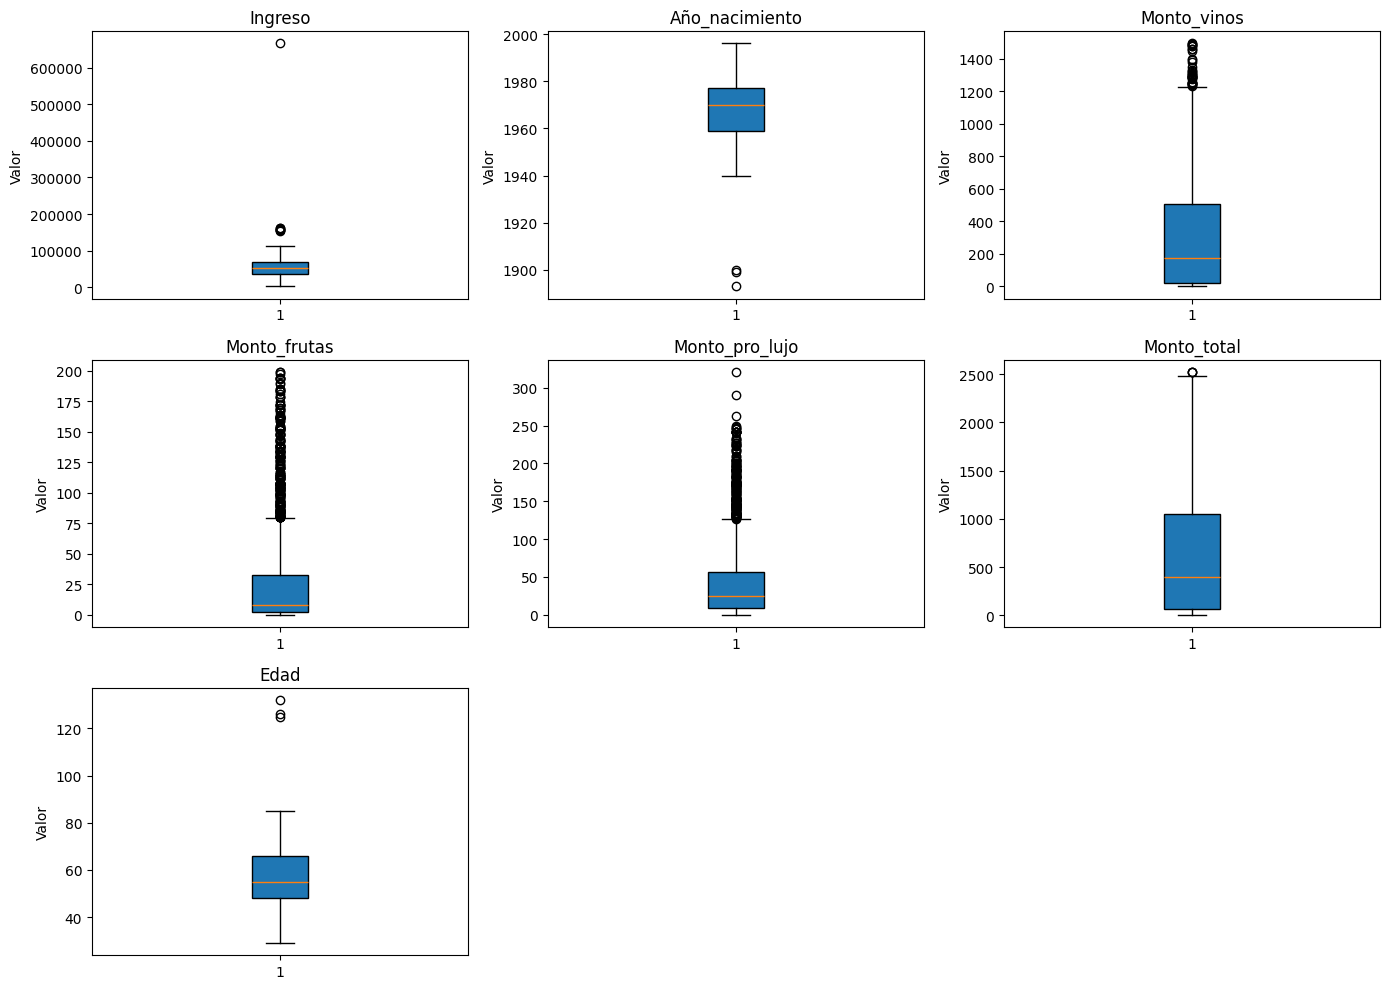

In [13]:
n = len(Columnas_numericas)

filas = 3
columnas = 3
fig, axes = plt.subplots(filas, columnas, figsize=(14, 10))
axes = axes.flatten()

for i, col in enumerate(Columnas_numericas):
    axes[i].boxplot(super_df[col].dropna(), vert=True, patch_artist=True)
    axes[i].set_title(col)
    axes[i].set_ylabel("Valor")
for j in range(i + 1, filas * columnas):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Se visualizan outliers en ingreso,frutas y lujos. Se realiza el conteto y se calcula la media y la mediana.

In [14]:
def contar_outliers(series, m=1.5):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - m * IQR
    limite_superior = Q3 + m * IQR
    outliers = series[(series < limite_inferior) | (series > limite_superior)]
    return len(outliers)

In [15]:
resultados = {}
for col in Columnas_numericas:
    media = super_df[col].mean()
    mediana = super_df[col].median()
    outliers = contar_outliers(super_df[col])
    resultados[col] = {
        "Media": round(media, 2),
        "Mediana": round(mediana, 2),
        "Outliers": outliers
    }

    resumen = pd.DataFrame(resultados).T
print("Resumen de columnas numéricas:")
display(resumen)

Resumen de columnas numéricas:


,Media,Mediana,Outliers
Ingreso,52247.25,51381.5,8.0
Año_nacimiento,1968.82,1970.0,3.0
Monto_vinos,305.09,174.5,35.0
Monto_frutas,26.36,8.0,246.0
Monto_pro_lujo,43.97,24.5,205.0
Monto_total,607.08,396.5,3.0
Edad,56.18,55.0,3.0


Como se visualiza hay muchos outliers en Monto de lujo,Monto_frutas e Ingresos asi que procedemos a modificarlos con el limite que tiene cada uno

In [16]:
def limitar_outliers(df, columna, factor=1.5):

    Q1 = super_df[columna].quantile(0.25)
    Q3 = super_df[columna].quantile(0.75)
    IQR = Q3 - Q1
    limite_inf = Q1 - factor * IQR
    limite_sup = Q3 + factor * IQR

    super_df[columna] = np.where(super_df[columna] < limite_inf, limite_inf,
                           np.where(super_df[columna] > limite_sup, limite_sup, df[columna]))
    return super_df

super_df = limitar_outliers(super_df, 'Monto_frutas')
super_df = limitar_outliers(super_df, 'Monto_pro_lujo')
super_df = limitar_outliers(super_df, 'Ingreso')

for col in ['Monto_frutas', 'Monto_pro_lujo','Ingreso']:
    Q1 = super_df[col].quantile(0.25)
    Q3 = super_df[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = super_df[(super_df[col] < Q1 - 1.5*IQR) | (super_df[col] > Q3 + 1.5*IQR)]
    print(f"{col}: {len(outliers)} outliers restantes")

Monto_frutas: 0 outliers restantes
Monto_pro_lujo: 0 outliers restantes
Ingreso: 0 outliers restantes


Gráficos univarados. En los que visualizaramos ingresos,y los montos ya sin los outliers

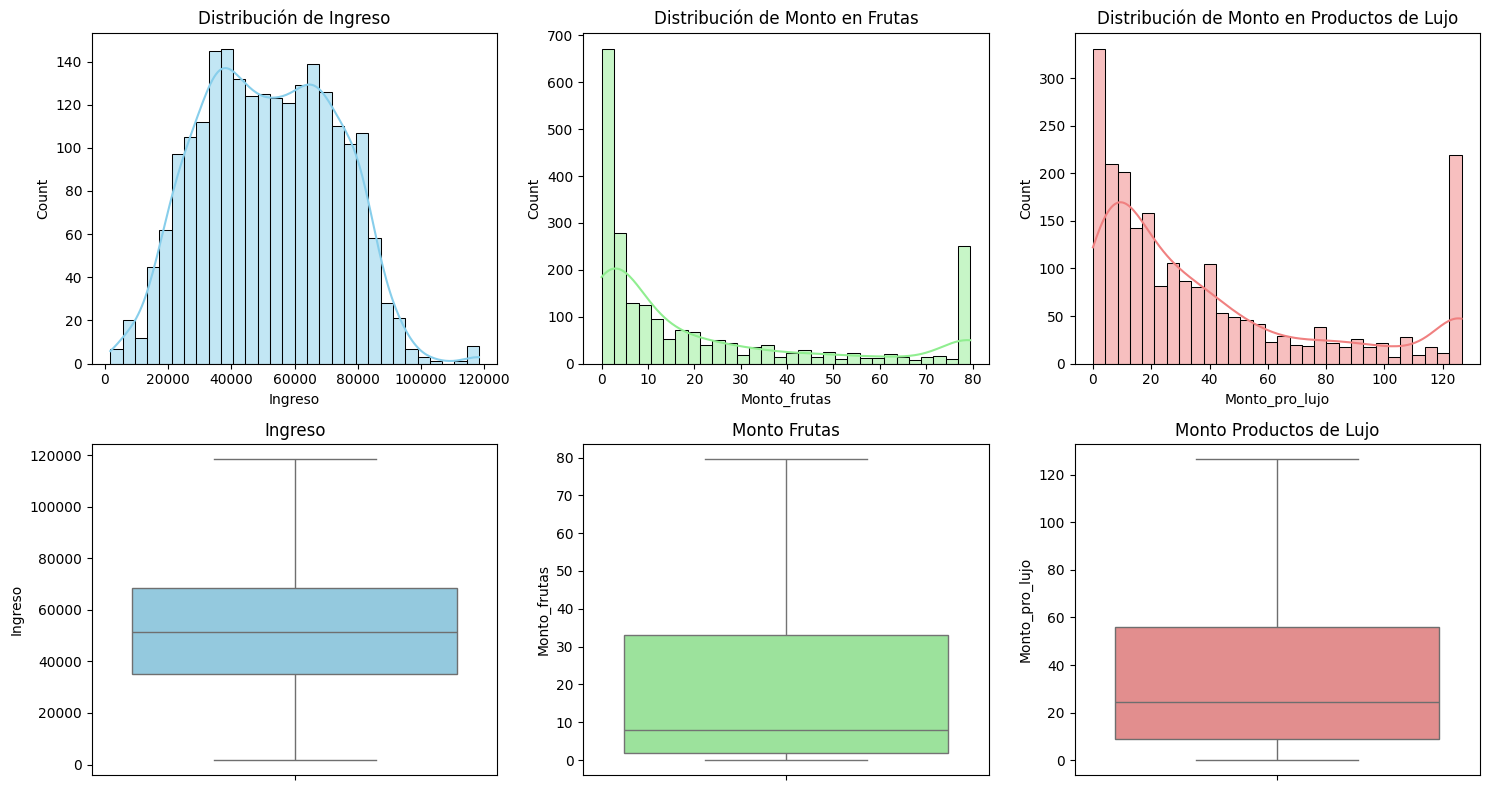

In [17]:
columnas = ['Ingreso', 'Monto_frutas', 'Monto_pro_lujo']

fig, axes = plt.subplots(2, 3, figsize=(15, 8))
sns.histplot(super_df['Ingreso'], bins=30, kde=True, color='skyblue', ax=axes[0,0])
axes[0,0].set_title("Distribución de Ingreso")

sns.histplot(super_df['Monto_frutas'], bins=30, kde=True, color='lightgreen', ax=axes[0,1])
axes[0,1].set_title("Distribución de Monto en Frutas")

sns.histplot(super_df['Monto_pro_lujo'], bins=30, kde=True, color='lightcoral', ax=axes[0,2])
axes[0,2].set_title("Distribución de Monto en Productos de Lujo")

sns.boxplot(y=super_df['Ingreso'], ax=axes[1,0], color='skyblue')
axes[1,0].set_title('Ingreso')

sns.boxplot(y=super_df['Monto_frutas'], ax=axes[1,1], color='lightgreen')
axes[1,1].set_title('Monto Frutas')

sns.boxplot(y=super_df['Monto_pro_lujo'], ax=axes[1,2], color='lightcoral')
axes[1,2].set_title('Monto Productos de Lujo')

plt.tight_layout()
plt.show()

Graficos bi-variados

/tmp/ipython-input-2733935555.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='grupo', y='Monto_vinos', data=super_df, palette='Set2', ax=axes[0], estimator='mean')
/tmp/ipython-input-2733935555.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='grupo', y='Monto_frutas', data=super_df, palette='Set3', ax=axes[1], estimator='mean')
/tmp/ipython-input-2733935555.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='grupo', y='Monto_pro_lujo', data=super_df, palette='Pastel1', ax=axes[2], estimator='mean')


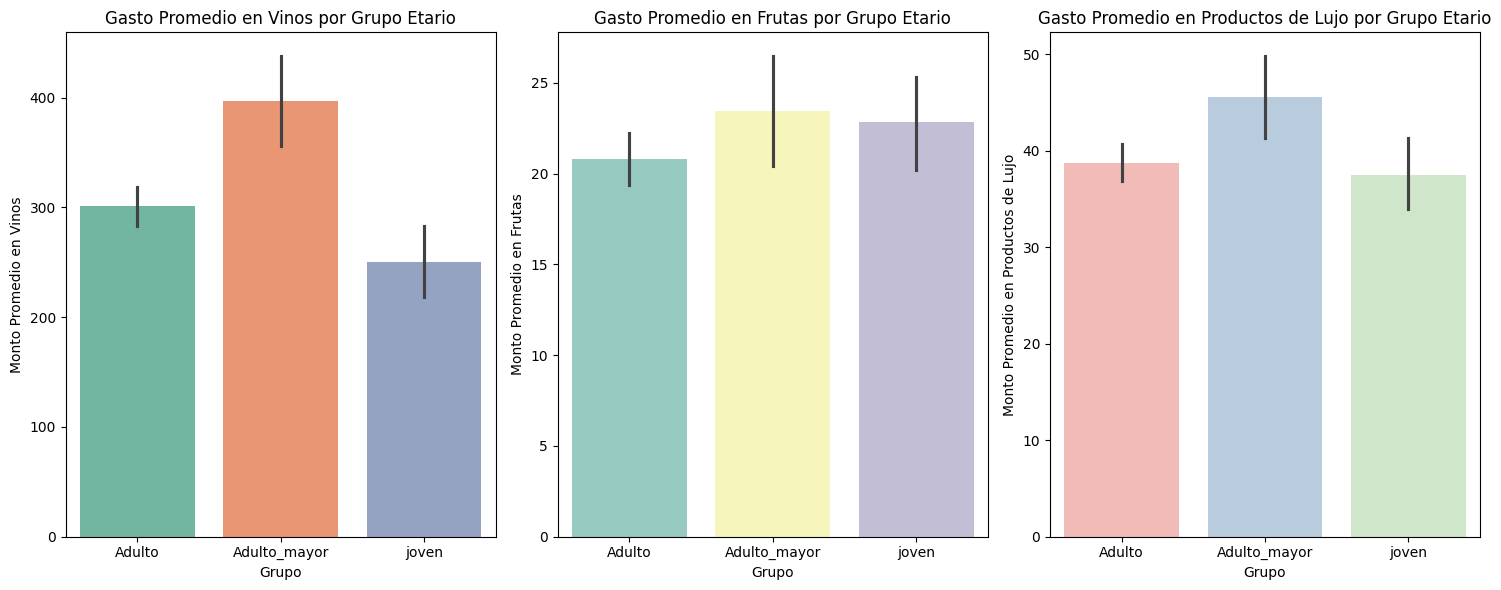

In [18]:

columnas = ['Monto_vinos', 'Monto_frutas', 'Monto_pro_lujo']

fig, axes = plt.subplots(1, 3, figsize=(15, 6))

sns.barplot(x='grupo', y='Monto_vinos', data=super_df, palette='Set2', ax=axes[0], estimator='mean')
axes[0].set_title('Gasto Promedio en Vinos por Grupo Etario')
axes[0].set_xlabel('Grupo')
axes[0].set_ylabel('Monto Promedio en Vinos')

sns.barplot(x='grupo', y='Monto_frutas', data=super_df, palette='Set3', ax=axes[1], estimator='mean')
axes[1].set_title('Gasto Promedio en Frutas por Grupo Etario')
axes[1].set_xlabel('Grupo')
axes[1].set_ylabel('Monto Promedio en Frutas')

sns.barplot(x='grupo', y='Monto_pro_lujo', data=super_df, palette='Pastel1', ax=axes[2], estimator='mean')
axes[2].set_title('Gasto Promedio en Productos de Lujo por Grupo Etario')
axes[2].set_xlabel('Grupo')
axes[2].set_ylabel('Monto Promedio en Productos de Lujo')

plt.tight_layout()
plt.show()

Podemos visualizar cómo el joven es el que menos gasta en vinos y productos de lujo. También vemos que el adulto mayor es el que más gasta en vino y productos de lujo, mientras que el adulto presenta gastos más parejos. Ahora veremos si esto está relacionado con la cantidad de niños que hay en el hogar.

Multivariado

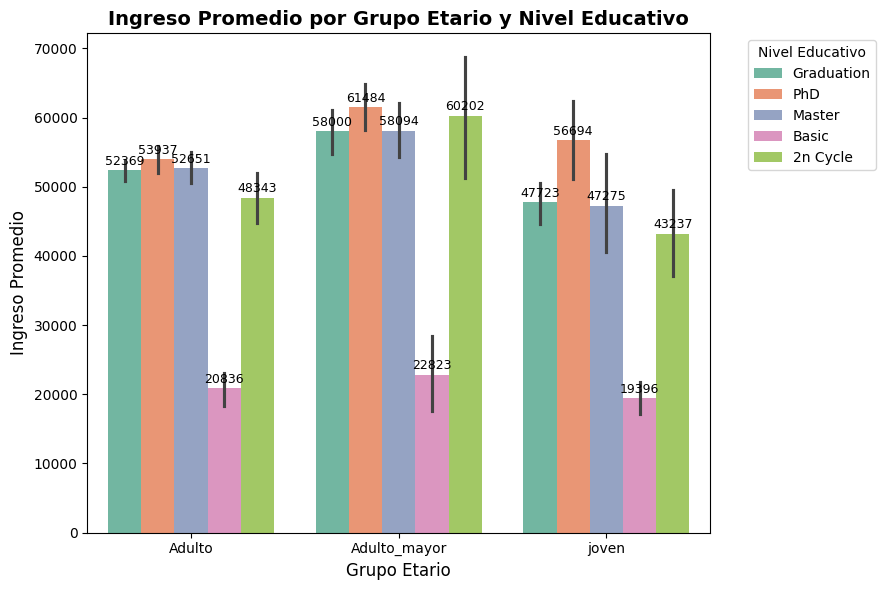

In [19]:
plt.figure(figsize=(9, 6))
ax = sns.barplot(
    data=super_df,
    x='grupo',
    y='Ingreso',
    hue='Educación',
    estimator='mean',
    palette='Set2'
)

plt.title('Ingreso Promedio por Grupo Etario y Nivel Educativo', fontsize=14, fontweight='bold')
plt.xlabel('Grupo Etario', fontsize=12)
plt.ylabel('Ingreso Promedio', fontsize=12)
plt.legend(title='Nivel Educativo', bbox_to_anchor=(1.05, 1), loc='upper left')

for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', label_type='edge', fontsize=9, padding=2)

plt.tight_layout()
plt.show()

Aquí podemos visualizar cómo el nivel de ingresos está ligado al nivel educativo y a la edad. Podemos concluir que quienes alcanzaron el grado máximo de estudios los adultos mayores, que además coinciden en ser quienes más consumen productos de lujo son también quienes más ingresos perciben.

ENTREGA FINAL


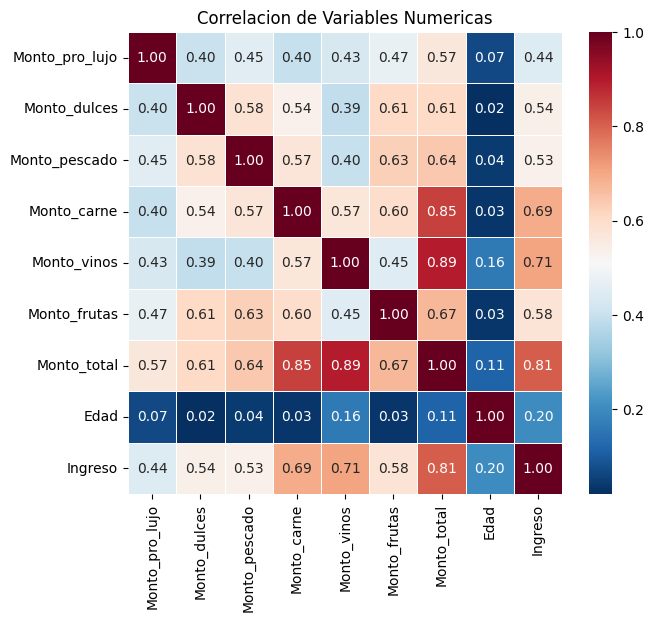

In [20]:
variables_numericas = [
    'Monto_pro_lujo', 'Monto_dulces', 'Monto_pescado','Monto_carne', 'Monto_vinos','Monto_frutas','Monto_total','Edad','Ingreso'
]
df_numerico = super_df[variables_numericas]

matriz_numerica = df_numerico.corr(method='pearson')

plt.figure(figsize=(7, 6))
sns.heatmap(
    matriz_numerica,
    annot=True,
    cmap='RdBu_r',
    fmt=".2f",
    linewidths=.5,
)
plt.title('Correlacion de Variables Numericas')
plt.show()

La matriz muestra que las variables Monto_vino (0.89) y Monto_carne (0.85) son las que presentan las correlaciones más altas con Monto_total, mientras que Monto_frutas, Monto_pescado y Monto_dulces tienen una correlación moderada con el gasto total. Esto es esperable, ya que estos consumos forman parte directa del monto total del cliente.

El ingreso también presenta una correlación moderada con el Monto_total (0.67), lo que sugiere que los clientes con mayores ingresos tienden a realizar compras más elevadas.

Por otro lado, el Monto_pro_lujo, a diferencia de lo que podría suponerse, muestra una correlación baja. Esto indica que, aunque el ingreso aumente, no necesariamente se incrementa el gasto en productos de lujo, lo cual puede deberse a que este tipo de consumo está más influido por preferencias personales que por la capacidad económica.

Encoding de la variable Grupo para luego poder realizar el split

In [21]:
from sklearn.preprocessing import LabelEncoder


In [22]:
le = LabelEncoder()
super_df['grupo_cod'] = le.fit_transform(super_df['grupo'])
le.classes_


array(['Adulto', 'Adulto_mayor', 'joven'], dtype=object)

In [23]:
X = super_df[[
    'Ingreso', 'Edad',
    'Monto_vinos', 'Monto_frutas', 'Monto_carne',
    'Monto_pescado', 'Monto_dulces', 'Monto_pro_lujo',
    'grupo']]

y = super_df['Monto_total']

In [24]:
super_df['grupo'].head()


,grupo
0,Adulto
1,Adulto_mayor
2,Adulto
3,joven
4,joven


In [25]:
super_df['grupo'].value_counts()


,count
grupo,
Adulto,1481
joven,419
Adulto_mayor,316


In [26]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

Variables

In [27]:
X = super_df[[
    'Ingreso',
    'Monto_vinos', 'Monto_frutas', 'Monto_carne',
    'Monto_pescado', 'Monto_dulces', 'Monto_pro_lujo']]

Split 80/20

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



Modelo

In [29]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [30]:
y_pred = lr.predict(X_test)
print("R2:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))

R2: 0.9988004130276775
MSE: 489.21496444353704


In [31]:
coef = pd.DataFrame({
    'Variable': X.columns,
    'Coeficiente': lr.coef_
    })

display(coef)

,Variable,Coeficiente
0,Ingreso,-0.000082
1,Monto_vinos,0.996409
2,Monto_frutas,1.377380
3,Monto_carne,1.000328
4,Monto_pescado,1.042134
5,Monto_dulces,0.967241
6,Monto_pro_lujo,1.244872


Gráfico

/tmp/ipython-input-976411598.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=coef, x='Variable', y='Coeficiente', palette='coolwarm')


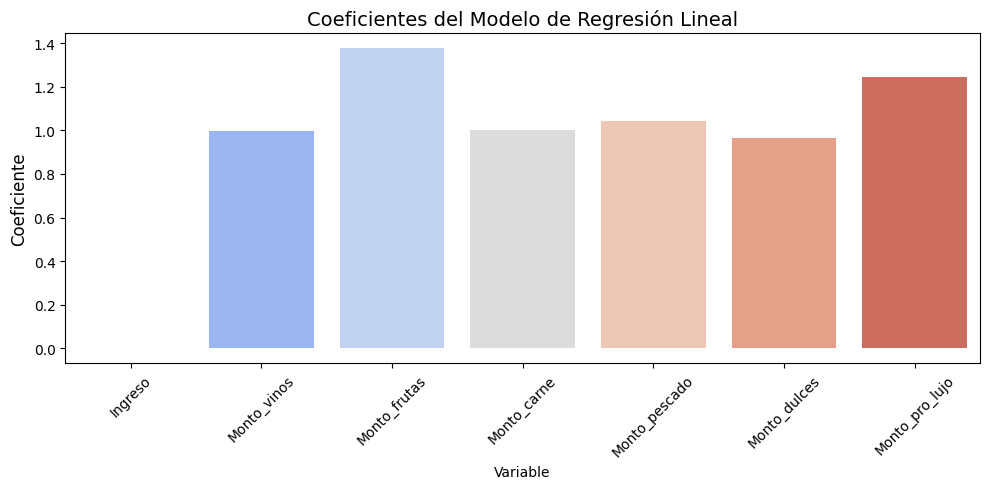

In [35]:
plt.figure(figsize=(10,5))
sns.barplot(data=coef, x='Variable', y='Coeficiente', palette='coolwarm')

plt.title('Coeficientes del Modelo de Regresión Lineal', fontsize=14)
plt.ylabel('Coeficiente', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Conclusión

El modelo de regresión lineal indica que los distintos consumos específicos (vinos, frutas, carnes, pescados, dulces y productos de lujo) son fuertes predictores del gasto total del cliente. Todos los coeficientes asociados a estos rubros se encuentran cercanos o superiores a 1, lo cual significa que, por cada unidad adicional gastada en un rubro, el gasto total aumenta aproximadamente en la misma proporción. Algunos rubros presentan un peso ligeramente mayor, como frutas (1.37), productos de lujo (1.24) y pescados (1.04), lo que indica que tienen una contribución más alta al monto total.

Por el contrario, el ingreso presenta un coeficiente prácticamente nulo (-0.000082), lo cual sugiere que el nivel de ingreso no explica el gasto total dentro de este conjunto de datos. Esto implica que el comportamiento de compra no está determinado por la capacidad económica, sino por las preferencias y hábitos de consumo en categorías específicas.

En conjunto, los resultados confirman parcialmente la hipótesis planteada: los consumos específicos sí predicen el gasto total, pero el ingreso no tiene un efecto significativo en este comportamiento.

Segunda hipótesis


In [51]:
 from sklearn.preprocessing import OneHotEncoder
 from sklearn.multioutput import MultiOutputRegressor
 from sklearn.metrics import mean_absolute_error, mean_squared_error
 from sklearn.ensemble import RandomForestRegressor

In [39]:
encoder = OneHotEncoder(drop='first', sparse_output=False)
X = encoder.fit_transform(super_df[['grupo']])

X = pd.DataFrame(X, columns=encoder.get_feature_names_out(['grupo']))

Variables

In [40]:
Y = super_df[['Monto_vinos', 'Monto_frutas', 'Monto_carne',
              'Monto_pescado', 'Monto_dulces', 'Monto_pro_lujo']]

In [ ]:
Split

In [42]:

X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42)

In [45]:
base_model = LinearRegression()
model = MultiOutputRegressor(base_model)
model.fit(X_train, Y_train)

MultiOutputRegressor(estimator=LinearRegression())

In [47]:
Y_pred = model.predict(X_test)

In [49]:
metricas = []

for i, col in enumerate(Y.columns):

    y_true = Y_test.iloc[:, i]
    y_pred_i = Y_pred[:, i]

    mae = mean_absolute_error(y_true, y_pred_i)
    mse = mean_squared_error(y_true, y_pred_i)
    rmse = np.sqrt(mse)
    mape = np.mean(np.abs((y_true - y_pred_i) / y_true)) * 100

    # R² y R² ajustado
    r2 = r2_score(y_true, y_pred_i)
    n = len(y_true)
    p = X.shape[1]  # número de predictores
    r2_adj = 1 - (1 - r2) * (n - 1) / (n - p - 1)

    metricas.append([col, mae, rmse, r2, r2_adj])

metricas_df = pd.DataFrame(metricas,
                           columns=['Consumo', 'MAE', 'RMSE', 'R²', 'R² Ajustado'])
metricas_df

,Consumo,MAE,RMSE,R²,R² Ajustado
0,Monto_vinos,279.414446,348.574295,0.003995,-0.000522
1,Monto_frutas,22.755606,27.560384,0.002331,-0.002193
2,Monto_carne,171.481181,233.388307,0.005994,0.001486
3,Monto_pescado,43.847048,60.814209,-0.008307,-0.012879
4,Monto_dulces,30.077660,43.654565,-0.000675,-0.005213
5,Monto_pro_lujo,32.277849,39.783061,0.006363,0.001857


Evaluaremos vinos únicamente para dejarlo graficado, ya que en la evaluación anterior quedó claro que no existe relación significativa. Por lo tanto, el rango etario queda descartado como predictor de consumos.
En conclusión, la edad del cliente no influye de manera relevante en sus niveles de consumo.

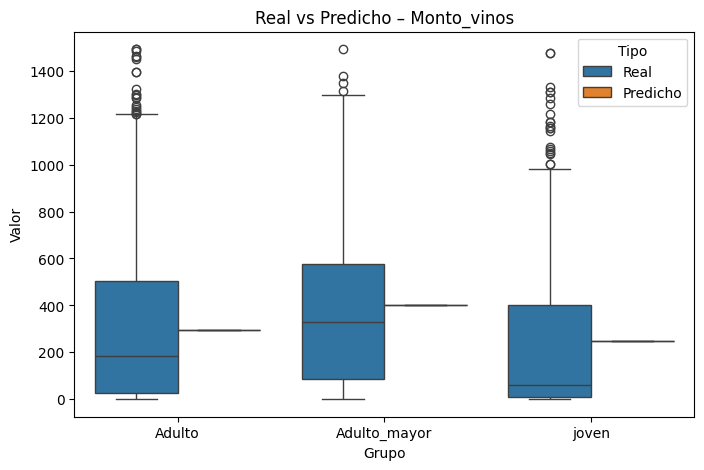

In [55]:

variable = 'Monto_vinos'
pred_full = model.predict(grupo_df)

col_index = list(Y.columns).index(variable)
pred_values = pred_full[:, col_index]

df_plot = pd.DataFrame({
    'Valor': list(super_df[variable]) + list(pred_values),
    'Tipo': ['Real']*len(super_df) + ['Predicho']*len(super_df),
    'Grupo': list(super_df['grupo']) + list(super_df['grupo'])
})
plt.figure(figsize=(8,5))
sns.boxplot(data=df_plot, x='Grupo', y='Valor', hue='Tipo')
plt.title(f"Real vs Predicho – {variable}")
plt.show()

Vamos a entrenar otro modelo para poder compar y ver si logramos mejores resultados.

In [56]:
X = super_df[['Ingreso', 'Edad', 'grupo_cod']]
Y = super_df[['Monto_vinos', 'Monto_frutas', 'Monto_carne',
              'Monto_pescado', 'Monto_dulces', 'Monto_pro_lujo']]


In [57]:
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42)

Entrenando modelo

In [58]:
rf = RandomForestRegressor(
    n_estimators=300,
    max_depth=None,
    random_state=42)
rf.fit(X_train, Y_train)

RandomForestRegressor(n_estimators=300, random_state=42)

In [59]:
Y_pred = rf.predict(X_test)

In [61]:
metricas = []

for i, col in enumerate(Y.columns):
    mae = mean_absolute_error(Y_test[col], Y_pred[:, i])
    rmse = mean_squared_error(Y_test[col], Y_pred[:, i]) ** 0.5
    r2 = r2_score(Y_test[col], Y_pred[:, i])

    metricas.append([col, mae, rmse, r2])
metricas_df = pd.DataFrame(metricas, columns=['Consumo', 'MAE', 'RMSE', 'R²'])
metricas_df

,Consumo,MAE,RMSE,R²
0,Monto_vinos,145.195820,226.912168,0.577928
1,Monto_frutas,14.581068,21.059613,0.417472
2,Monto_carne,91.079100,161.271465,0.525380
3,Monto_pescado,27.041460,43.837514,0.476069
4,Monto_dulces,21.492215,35.964105,0.320840
5,Monto_pro_lujo,26.087732,35.278674,0.218632


,Variable,Importancia
0,Ingreso,0.826667
1,Edad,0.162001
2,grupo_cod,0.011331


/tmp/ipython-input-4063388519.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importances, x='Importancia', y='Variable', palette='viridis')


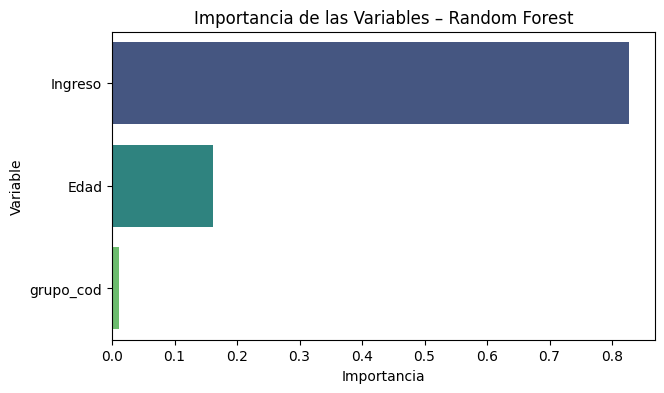

In [62]:
importances = pd.DataFrame({
    'Variable': X.columns,
    'Importancia': rf.feature_importances_
}).sort_values(by='Importancia', ascending=False)

display(importances)

plt.figure(figsize=(7,4))
sns.barplot(data=importances, x='Importancia', y='Variable', palette='viridis')
plt.title("Importancia de las Variables – Random Forest")
plt.xlabel("Importancia")
plt.ylabel("Variable")
plt.show()

Conclusion.

El modelo Random Forest captura relaciones no lineales entre la edad, el ingreso y el consumo, mejorando la capacidad predictiva respecto a la regresión linea.
Con los resultados de R2 podemos ver que el modelo puede predecir variables como Carne,vino de forma solida,en cuanto a pescado y frutas la variacion es un poco mayor pero aceptable.
Sin dudas es un mejor modelo.


Ahora respecto de las hipotesis formuladas podemos decir que fueron validadas parcialmente ya que con ingreso,edad y grupo etario solo podemos predecir el gsto en carne y vino de manera solida.

Conclusion final
El ingreso es la variable más determinante en el comportamiento de consumo.
Tanto en la matriz de correlación como en el análisis de importancia de variables del modelo Random Forest, el ingreso se posiciona como el predictor más fuerte. Esto indica que, a mayor capacidad económica, mayor es la probabilidad de que el cliente realice gastos elevados en distintas categorías. Este resultado confirma la hipótesis inicial de que el ingreso es un factor clave para explicar y predecir el gasto total.

Los consumos específicos predicen muy bien el gasto total.
Las categorías como vino, carne y pescado presentan correlaciones moderadas o altas con el gasto total, lo que refleja que el monto total consumido está compuesto principalmente por estos rubros. Esto implica que el gasto total puede ser estimado con buena precisión utilizando estos consumos como variables explicativas.

La edad y el grupo etario muestran un impacto mucho menor.

La predictibilidad de los consumos varía según la categoría.
Las categorías como vinos y carnes alcanzaron valores de R² superiores a 0.50, indicando una capacidad predictiva aceptable. En cambio, rubros más ligados a preferencias personales, como dulces o productos de lujo, mostraron valores de R² bajos.